In [14]:
import numpy as np
from astropy.io import fits
from marvin.tools import Maps
from tqdm import tqdm
import Bicone_Classifier
import multiprocessing as mp
import copy
from importlib import reload


In [18]:
my_module = reload(Bicone_Classifier)

## Iterate through the galaxies

In [30]:
def first_filter(data):
    
    if len(data) >= 2:
        try:

            ellip = Bicone_Classifier.ellip_gen(data)
            loss_list = []

            for i in np.arange(0.6, 2, 0.2):
                start, end = round(i,1), round(i,1)+0.3
                curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
                result = Bicone_Classifier.fourier_classifier(curve)

                if result[1][1] == 3:
                    loss_list.append(result[2])
                else:
                    loss_list.append(np.array([0]))

            return data, sum(loss_list)
        
        except:
            pass
            
    else:
        pass

In [31]:
if __name__ == '__main__':
    pool = mp.Pool(processes=4)

    results = []
    for result in pool.imap_unordered(first_filter, plateifu):
        results.append(result)
       
    #print(results)

Process ForkPoolWorker-34:
Process ForkPoolWorker-36:
Process ForkPoolWorker-35:
Process ForkPoolWorker-33:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/runquanguan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/runquanguan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/runquanguan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/runquanguan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/runquanguan/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/runquanguan/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._

In [32]:
result_copy = copy.deepcopy(results)


dtype = [('plateifu', np.unicode_, 16),('loss', float)]
result_unit = np.array(result_copy, dtype=dtype)       # create a structured array
result_sort = np.sort(result_unit, order='loss')  

result_sort[0:10]

array([('10519-1901',   0.        ), ('11832-1902',   0.        ),
       ('8458-1901', 104.82699769), ('10513-1902', 106.51600693),
       ('8132-1902', 120.29635673), ('11863-6103', 139.26123445),
       ('9091-12703', 146.03086933), ('8936-1902', 151.10441973),
       ('8449-1902', 160.07165649), ('12512-1902', 169.79574398)],
      dtype=[('plateifu', '<U16'), ('loss', '<f8')])

[WARNING]: subprocess 27002 is still running (ResourceWarning)


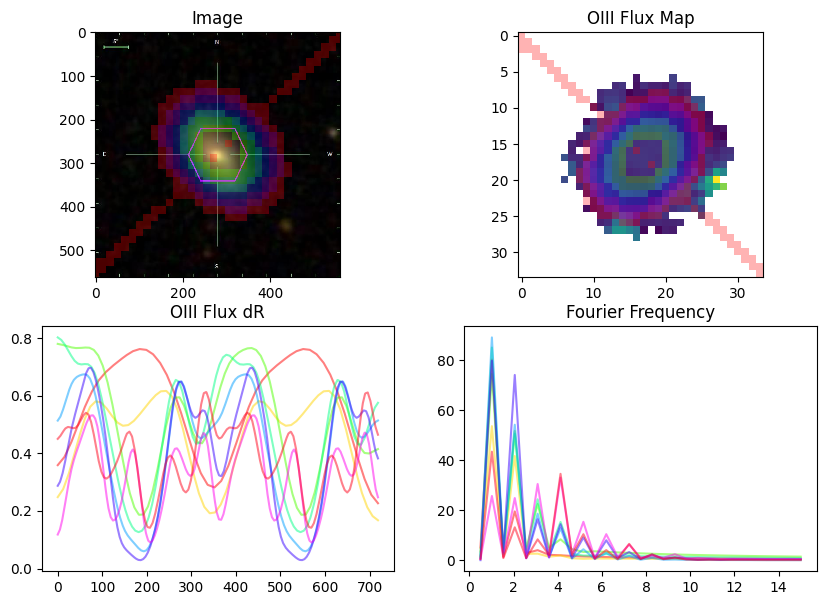

[WARNING]: subprocess 27007 is still running (ResourceWarning)


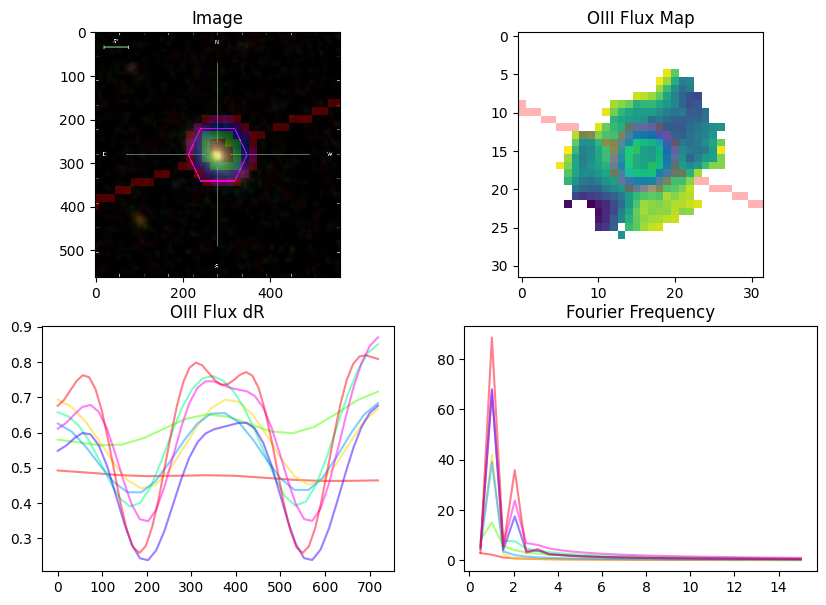

[WARNING]: subprocess 27014 is still running (ResourceWarning)


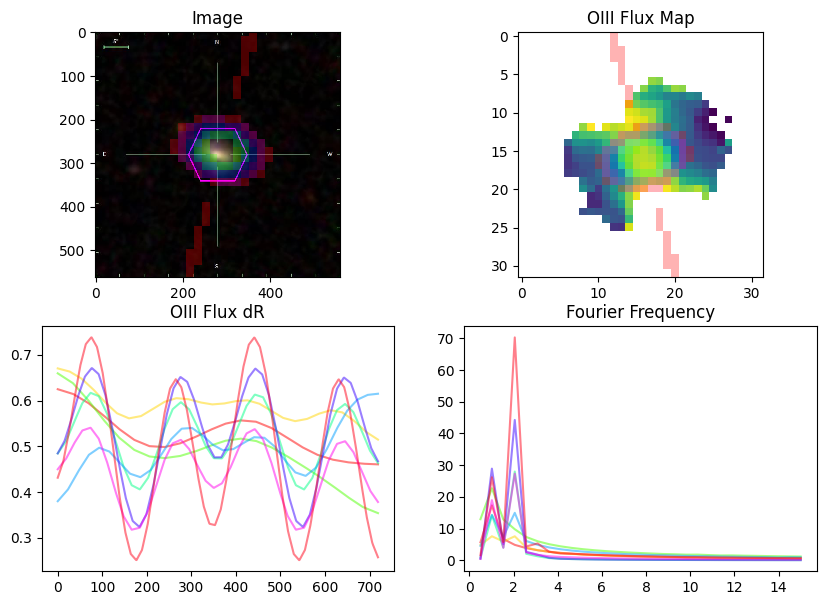

[WARNING]: subprocess 27020 is still running (ResourceWarning)


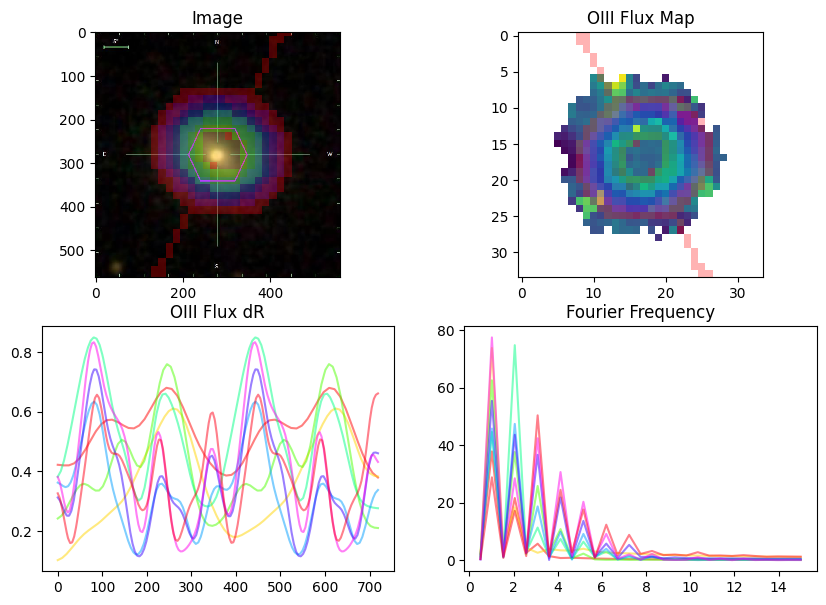

[WARNING]: subprocess 27026 is still running (ResourceWarning)


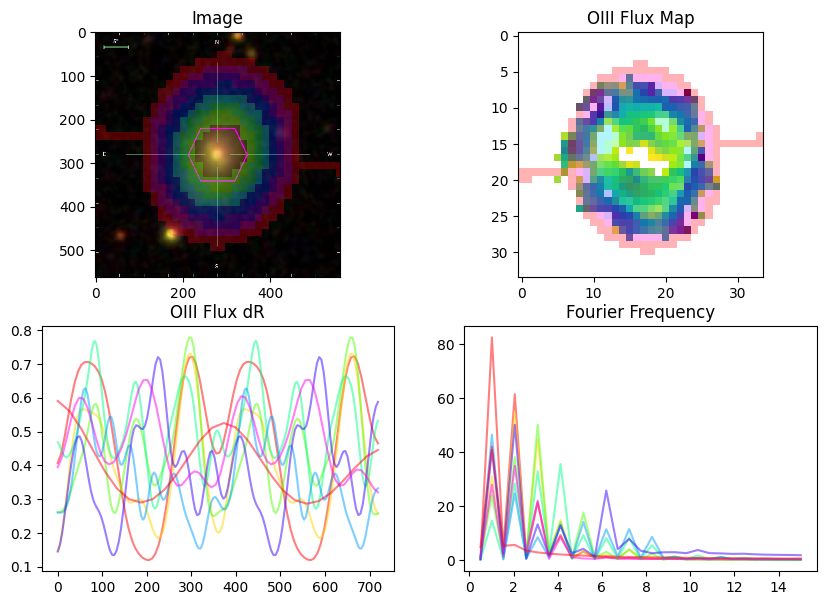

[WARNING]: subprocess 27032 is still running (ResourceWarning)


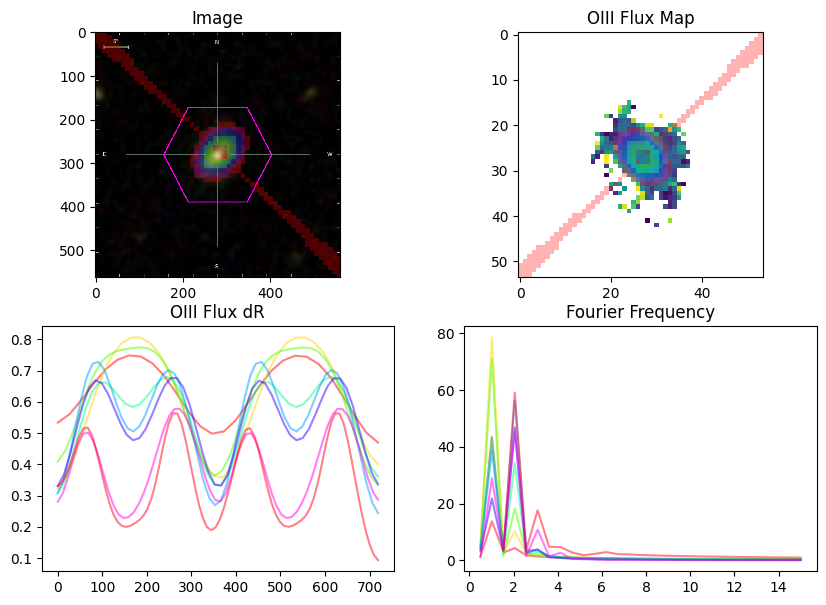

[WARNING]: subprocess 27038 is still running (ResourceWarning)


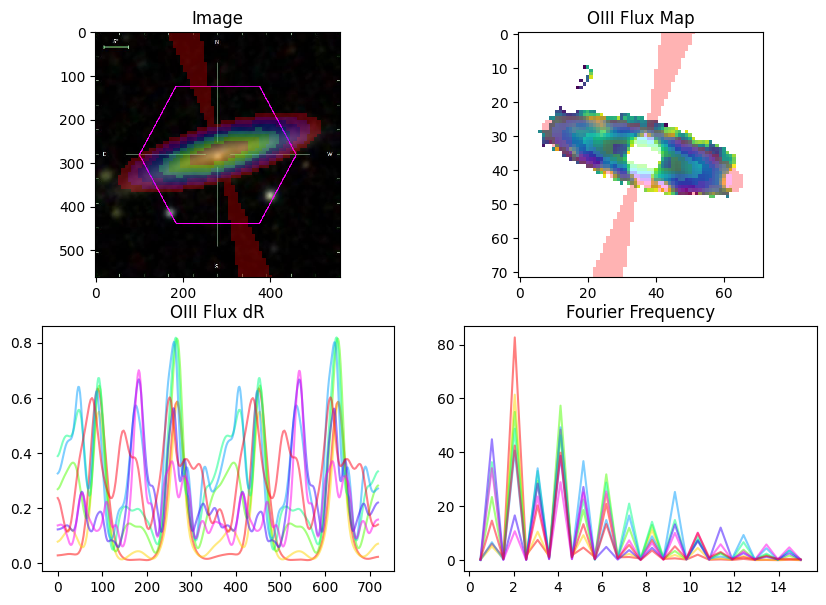

[WARNING]: subprocess 27044 is still running (ResourceWarning)


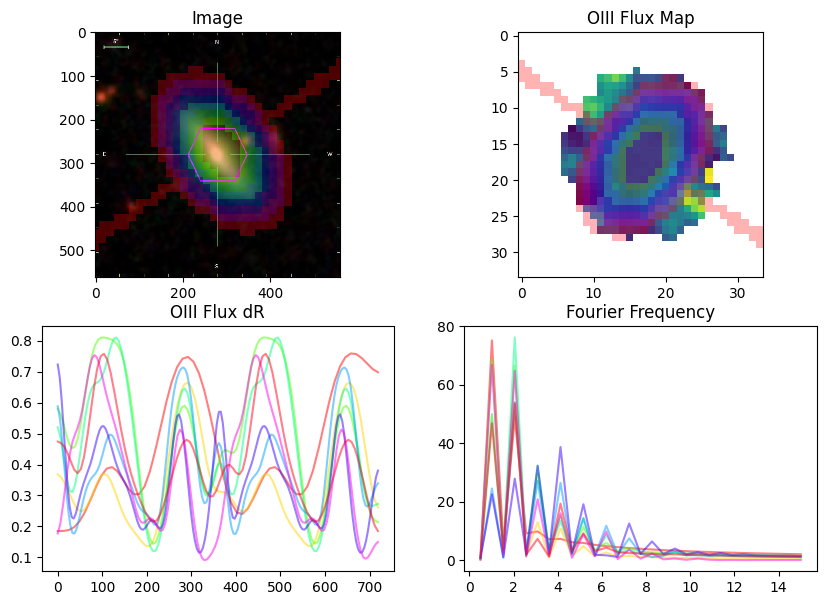

[WARNING]: subprocess 27050 is still running (ResourceWarning)


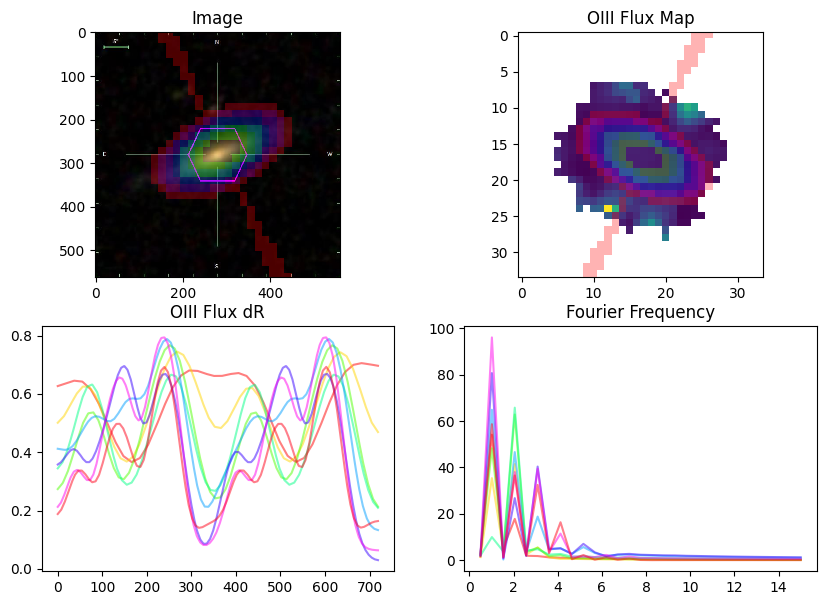

[WARNING]: subprocess 27056 is still running (ResourceWarning)


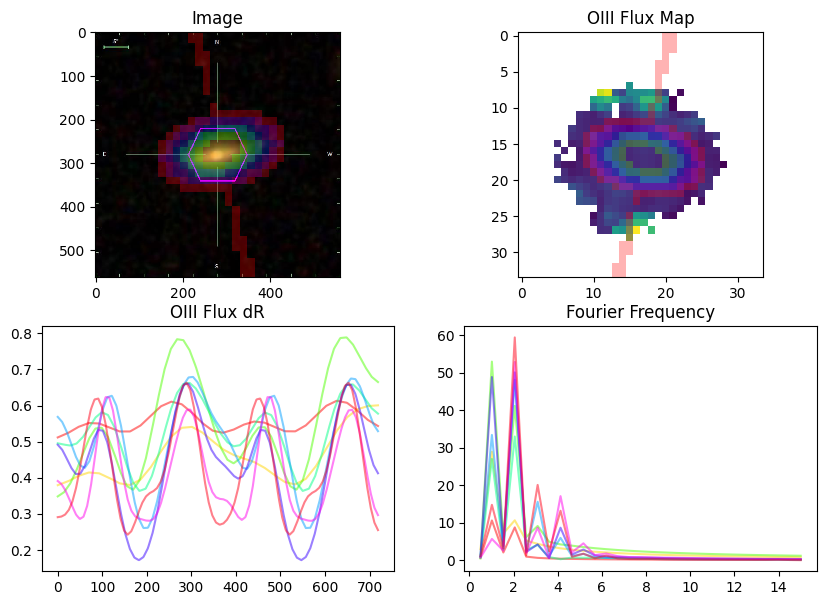

In [33]:
for i in result_sort[0:10]:
    Bicone_Classifier.plot_everything(i[0], inner = 0.6, outer = 2, step = 0.2)

In [53]:
def second_filter(data):        
    if len(data) >= 2:
        try:
            ellip = Bicone_Classifier.ellip_gen(data)
            axis_loss = []

            for i in np.arange(0.6, 2, 0.2):

                start, end = round(i,1), round(i,1)+0.3
                curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
                result = Bicone_Classifier.fourier_classifier(curve)

                axis_loss.append(result[4])

            return data, sum(axis_loss)/((2-0.6)/0.2)

        except:
            pass
    else:
        pass

In [56]:
if __name__ == '__main__':
    pool = mp.Pool(processes=4)

    results_2 = []
    for result in pool.imap_unordered(second_filter, plateifu):
        results_2.append(result)
       
    #print(results)

--- Logging error ---
Traceback (most recent call last):
  File "/Users/runquanguan/anaconda3/lib/python3.7/site-packages/marvin/tools/mixins/mma.py", line 132, in __init__
    self._doLocal()
  File "/Users/runquanguan/anaconda3/lib/python3.7/site-packages/marvin/tools/mixins/mma.py", line 291, in _doLocal
    raise MarvinError('failed to retrieve data using '
marvin.core.exceptions.MarvinError: failed to retrieve data using input parameters.
You can submit this error to Marvin GitHub Issues (https://github.com/sdss/marvin/issues/new).
Fill out a subject and some text describing the error that just occurred.
If able, copy and paste the full traceback information into the issue as well.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/runquanguan/anaconda3/lib/python3.7/logging/handlers.py", line 69, in emit
    self.doRollover()
  File "/Users/runquanguan/anaconda3/lib/python3.7/logging/handlers.py", line 393, in d

In [57]:
result_2_copy = copy.deepcopy(results_2)


dtype = [('plateifu', np.unicode_, 16),('loss', float)]
result_2_unit = np.array(result_2_copy, dtype=dtype)       # create a structured array
result_2_sort = np.sort(result_2_unit, order='loss')  

result_2_sort[-11:-1]

array([('8568-1901', 36.        ), ('8614-1902', 36.14285714),
       ('8588-3703', 36.85714286), ('12491-3704', 37.28571429),
       ('11863-6103', 39.14285714), ('11834-9102', 42.85714286),
       ('10507-1901', 43.85714286), ('9485-3701', 44.14285714),
       ('10519-1901', 47.42857143), ('8458-1901', 57.85714286)],
      dtype=[('plateifu', '<U16'), ('loss', '<f8')])

[WARNING]: subprocess 27479 is still running (ResourceWarning)


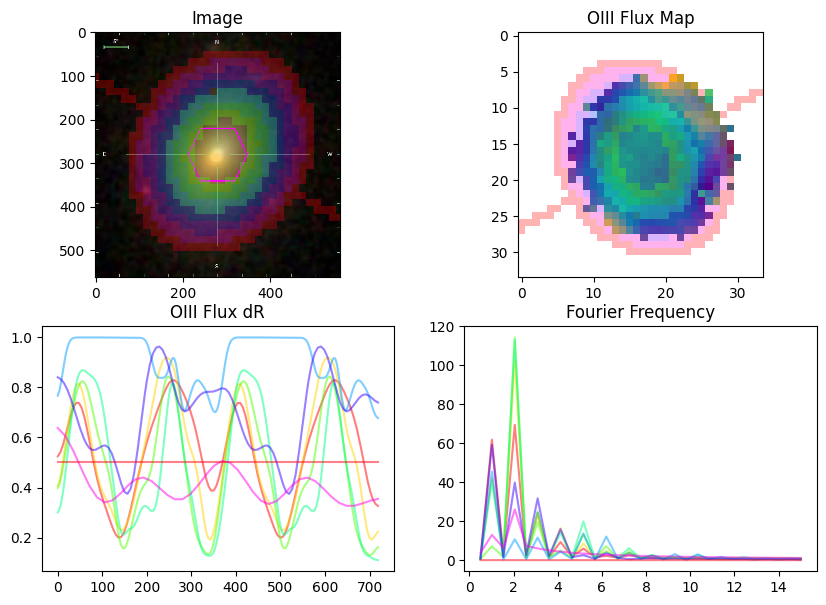

[WARNING]: subprocess 27487 is still running (ResourceWarning)


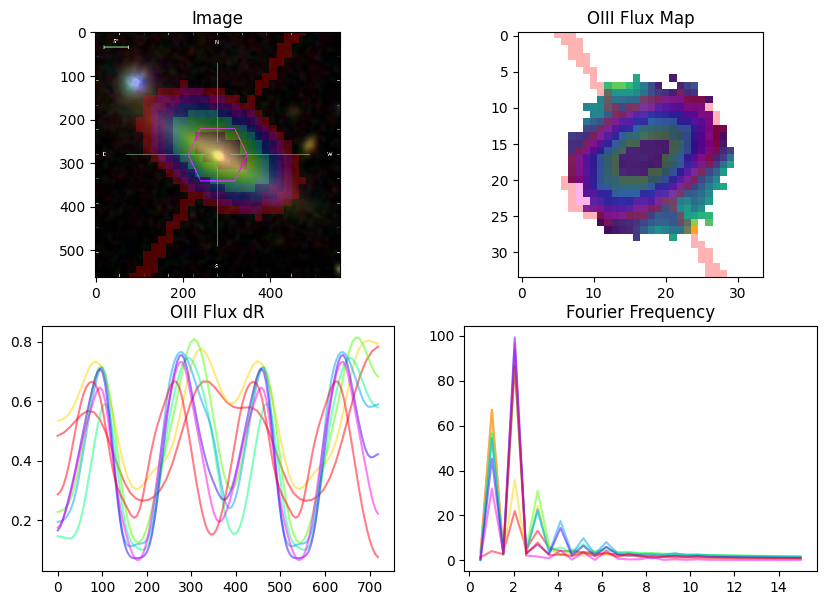

[WARNING]: subprocess 27492 is still running (ResourceWarning)


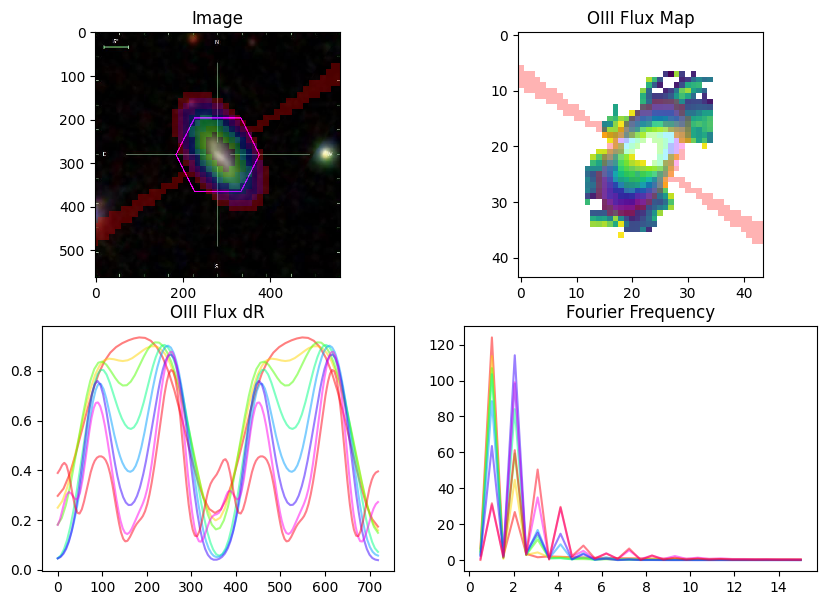

[WARNING]: subprocess 27498 is still running (ResourceWarning)


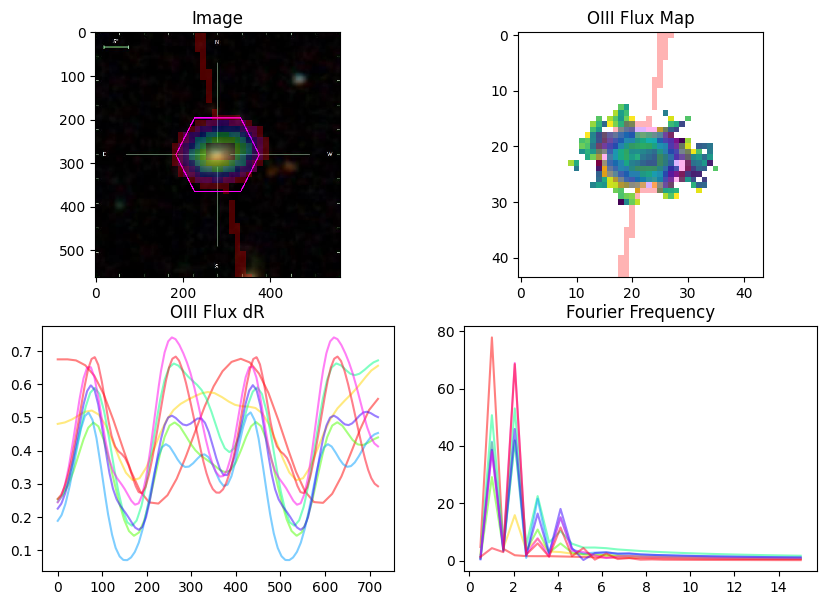

[WARNING]: subprocess 27504 is still running (ResourceWarning)


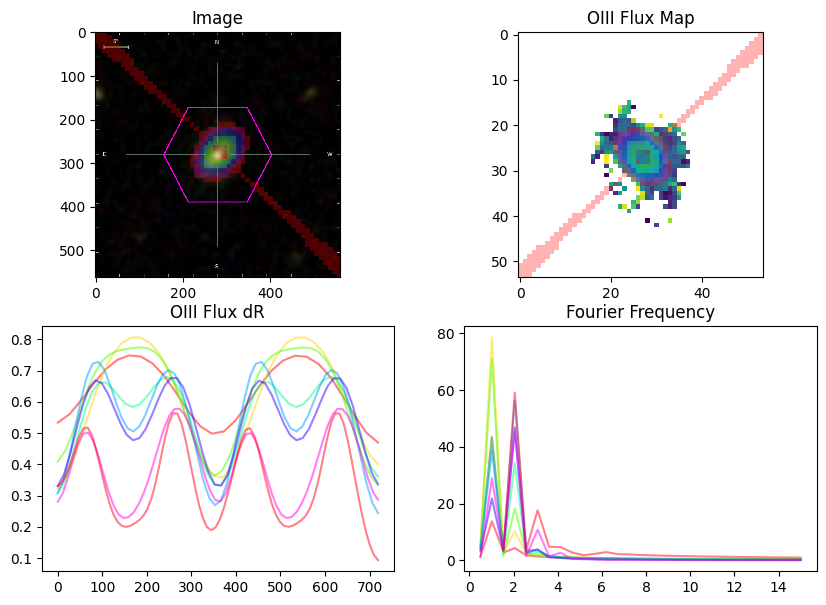

[WARNING]: subprocess 27510 is still running (ResourceWarning)


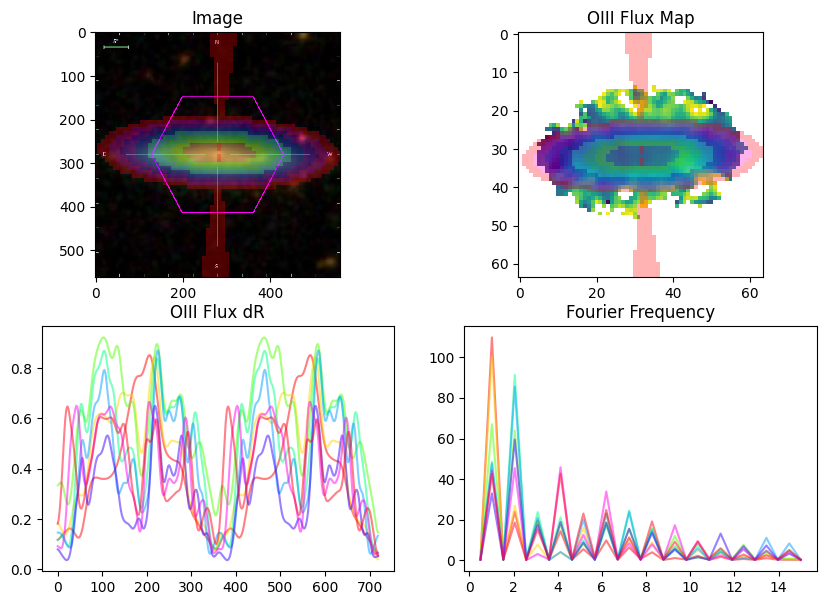

[WARNING]: subprocess 27516 is still running (ResourceWarning)


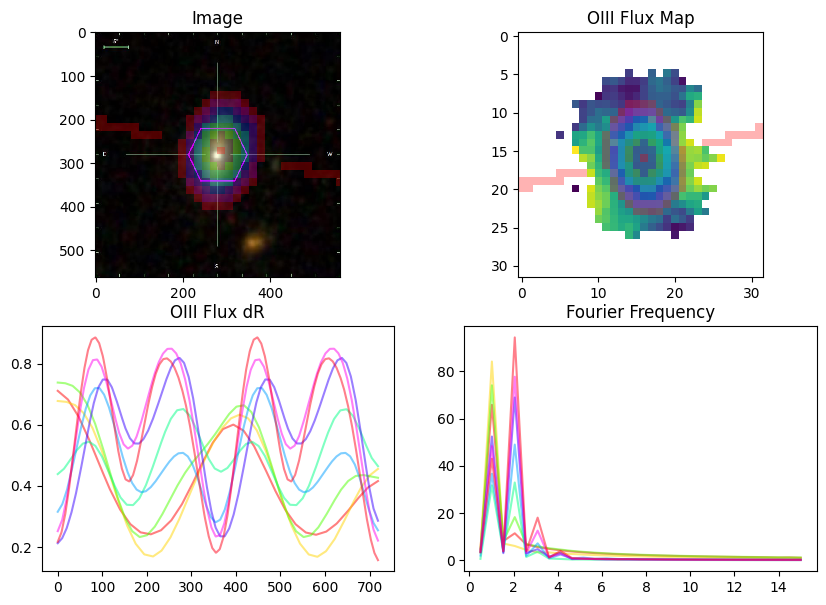

[WARNING]: subprocess 27523 is still running (ResourceWarning)


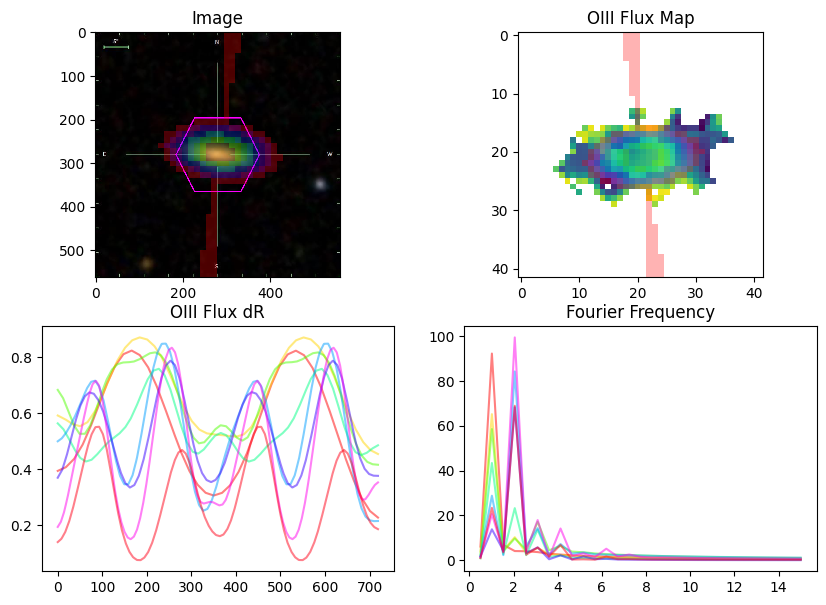

[WARNING]: subprocess 27529 is still running (ResourceWarning)


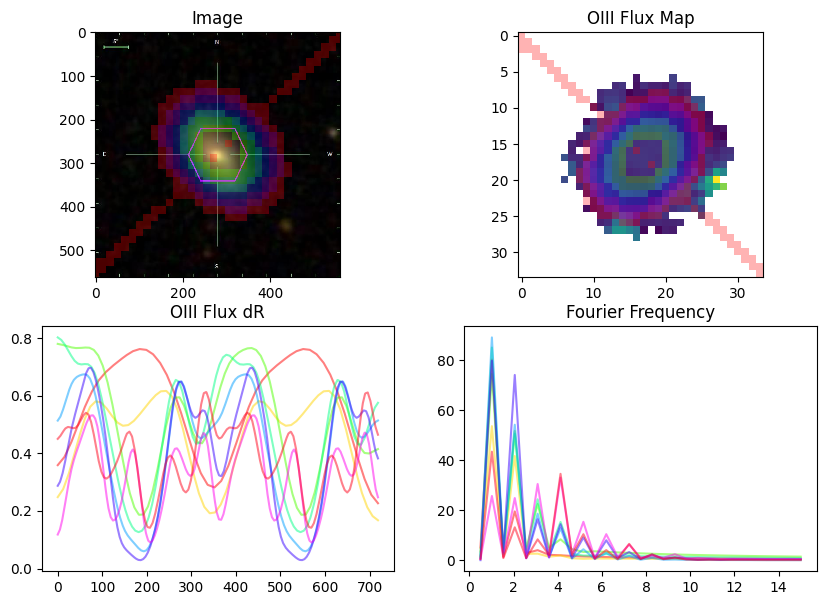

[WARNING]: subprocess 27535 is still running (ResourceWarning)


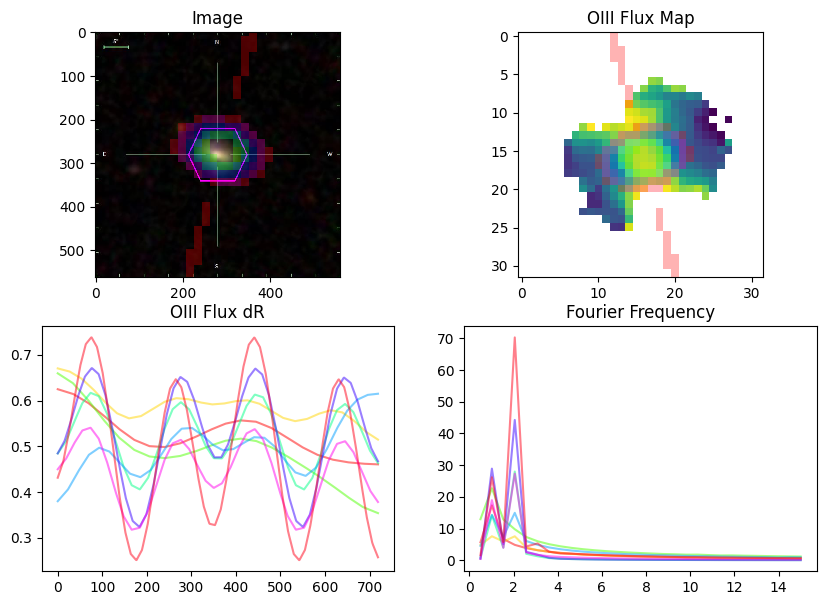

In [58]:
for i in result_2_sort[-11:-1]:
    Bicone_Classifier.plot_everything(i[0], inner = 0.6, outer = 2, step = 0.2)

In [61]:
def trial_filter(data):        
    if len(data) >= 2:
        try:
            ellip = Bicone_Classifier.ellip_gen(data)
            axis_loss = []

            for i in np.arange(0.2, 3, 2.8):

                start, end = round(i,1), round(i,1)+3
                curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
                result = Bicone_Classifier.fourier_classifier(curve)

                axis_loss.append(result[4])

            return data, sum(axis_loss)

        except:
            pass
    else:
        pass

In [62]:
if __name__ == '__main__':
    pool = mp.Pool(processes=4)

    results_2 = []
    for result in pool.imap_unordered(trial_filter, plateifu):
        results_2.append(result)
       
    #print(results)

In [63]:
result_2_copy = copy.deepcopy(results_2)


dtype = [('plateifu', np.unicode_, 16),('loss', float)]
result_2_unit = np.array(result_2_copy, dtype=dtype)       # create a structured array
result_2_sort = np.sort(result_2_unit, order='loss')  

result_2_sort[-11:-1]

array([('7963-3703', 34.), ('8588-1902', 34.), ('11968-3702', 36.),
       ('8080-3704', 37.), ('8568-1901', 39.), ('8445-9102', 40.),
       ('11834-9102', 47.), ('10519-1901', 50.), ('8998-6102', 53.),
       ('10513-1902', 75.)], dtype=[('plateifu', '<U16'), ('loss', '<f8')])

[WARNING]: subprocess 27672 is still running (ResourceWarning)


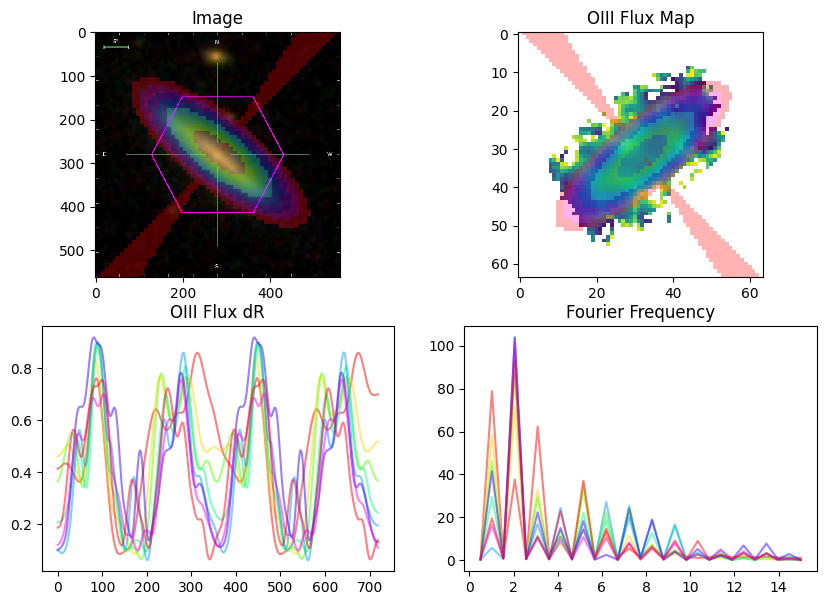

[WARNING]: subprocess 27678 is still running (ResourceWarning)


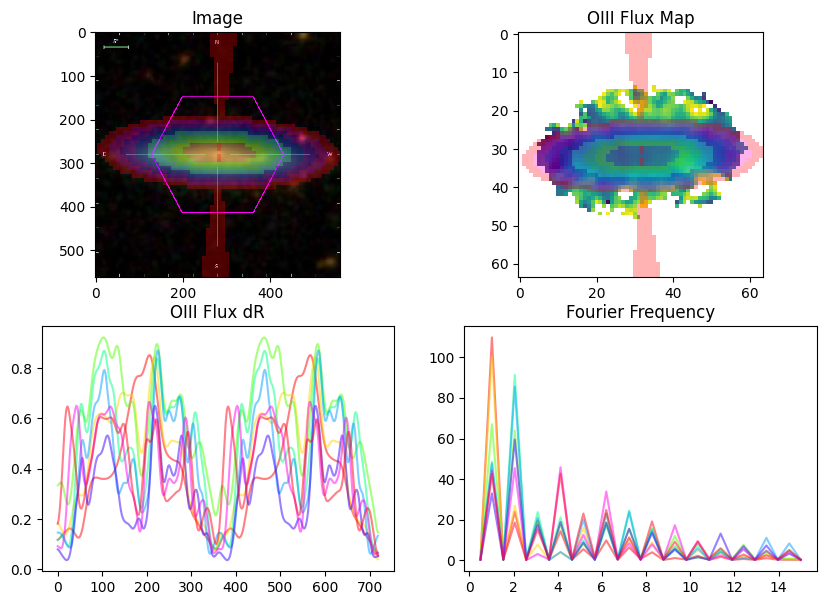

[WARNING]: subprocess 27684 is still running (ResourceWarning)


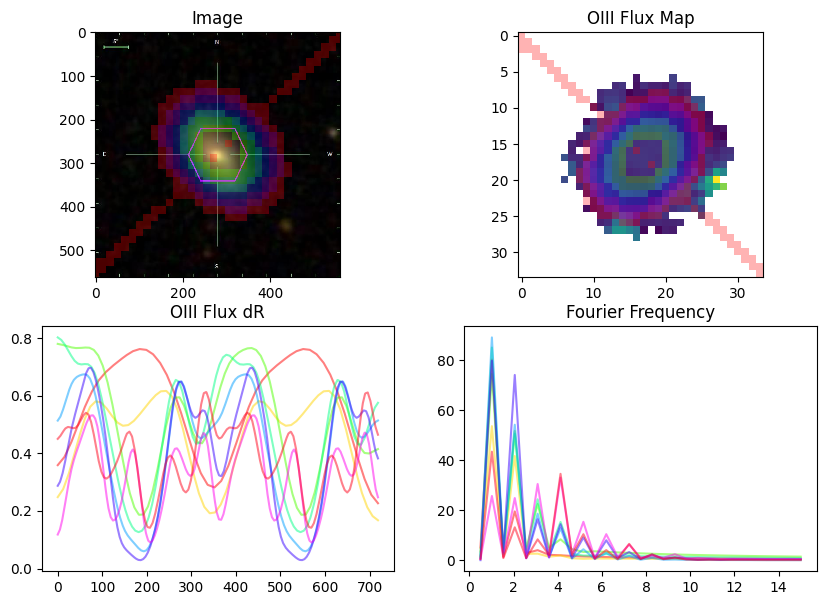

[WARNING]: subprocess 27690 is still running (ResourceWarning)


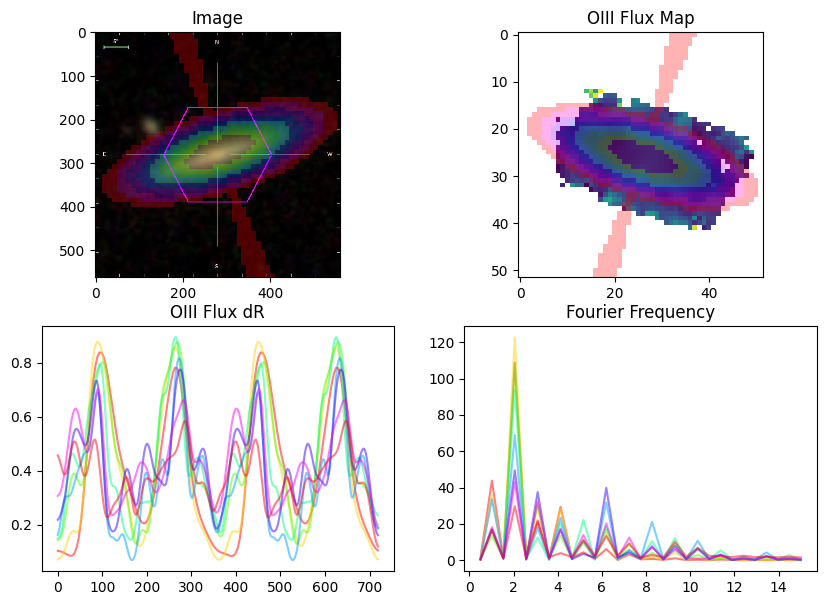

[WARNING]: subprocess 27697 is still running (ResourceWarning)


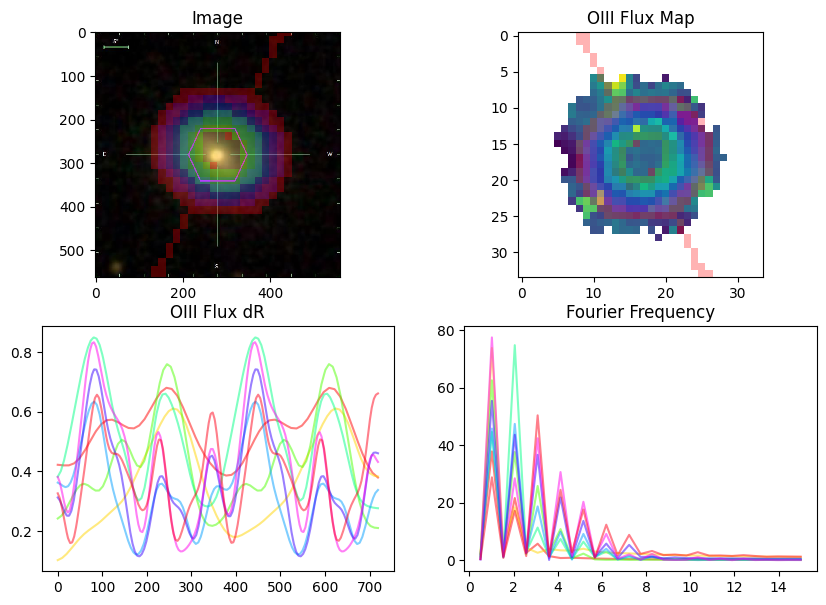

In [64]:
for i in result_2_sort[-6:-1]:
    Bicone_Classifier.plot_everything(i[0], inner = 0.6, outer = 2, step = 0.2)